In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as      em

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df1 = pd.read_csv('Sparkling.csv')
df1.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [3]:
dates = pd.date_range(start='01-01-1980',periods=len(df1),freq='M')
dates

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [4]:
df1['TimeStamp']=dates
df1.head()

,YearMonth,Sparkling,TimeStamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [5]:
df1.set_index('TimeStamp',inplace =True)

In [6]:
df1.head()

,YearMonth,Sparkling
TimeStamp,,
1980-01-31,1980-01,1686
1980-02-29,1980-02,1591
1980-03-31,1980-03,2304
1980-04-30,1980-04,1712
1980-05-31,1980-05,1471


In [7]:
df1.drop('YearMonth',axis=1,inplace =True)
df1.head()

,Sparkling
TimeStamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


<Figure size 864x432 with 0 Axes>

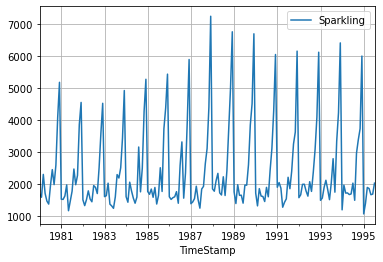

In [8]:
plt.figure(figsize=(12,6))
df1.plot()
plt.grid();

In [9]:
df1.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [10]:
print("Mean of the data",df1.mean())
print("Median of the data",df1.median())

Mean of the data Sparkling    2402.417112
dtype: float64
Median of the data Sparkling    1874.0
dtype: float64


In [11]:
print("Checking the null values in the data:",df1.isna().sum())

Checking the null values in the data: Sparkling    0
dtype: int64


<AxesSubplot:xlabel='TimeStamp', ylabel='Sparkling'>

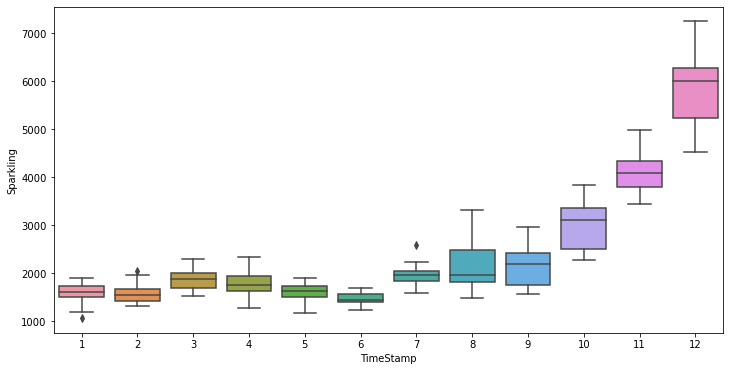

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(df1.index.month,df1.Sparkling)

<AxesSubplot:xlabel='TimeStamp', ylabel='Sparkling'>

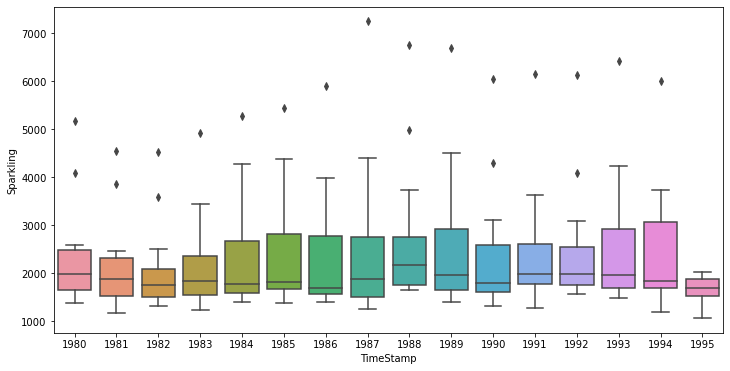

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(df1.index.year,df1.Sparkling)

<AxesSubplot:xlabel='TimeStamp', ylabel='Sparkling'>

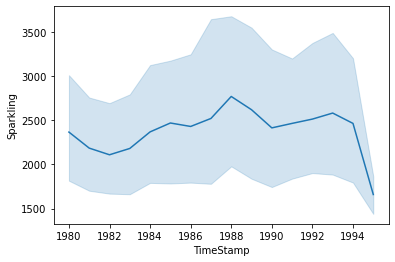

In [14]:
sns.lineplot(df1.index.year,df1.Sparkling)

<AxesSubplot:xlabel='TimeStamp', ylabel='Sparkling'>

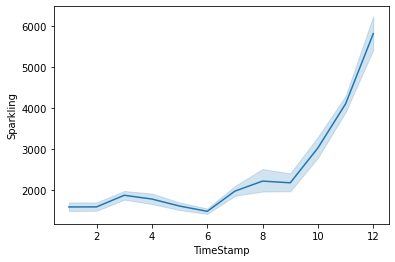

In [15]:
sns.lineplot(df1.index.month,df1.Sparkling)

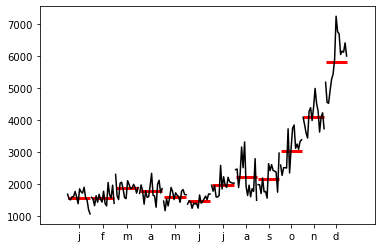

<Figure size 1080x720 with 0 Axes>

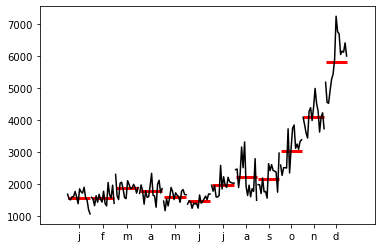

In [16]:
from statsmodels.graphics.tsaplots import month_plot
plt.figure(figsize=(15,10))
month_plot(df1)

In [17]:
yearly_month = pd.pivot_table(df1,values='Sparkling',columns=df1.index.month,index=df1.index.year)
yearly_month

TimeStamp,1,2,3,4,5,6,7,8,9,10,11,12
TimeStamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


<AxesSubplot:xlabel='TimeStamp'>

<Figure size 720x576 with 0 Axes>

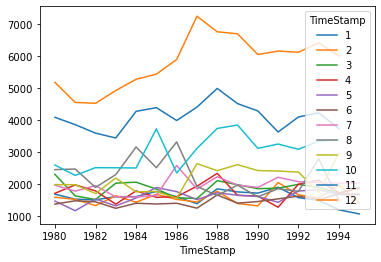

In [18]:
plt.figure(figsize=(10,8))
yearly_month.plot()

In [19]:
monthly_year = pd.pivot_table(df1,values='Sparkling',index=df1.index.month,columns=df1.index.year)
monthly_year

TimeStamp,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
TimeStamp,,,,,,,,,,,,,,,,
1,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
2,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
3,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
4,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
5,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0
6,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
7,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
8,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
9,1984.0,1981.0,1706.0,2191.0,1759.0,1771.0,1562.0,2638.0,2421.0,2608.0,2424.0,2408.0,2377.0,1749.0,2968.0,NaN


<AxesSubplot:xlabel='TimeStamp'>

<Figure size 864x432 with 0 Axes>

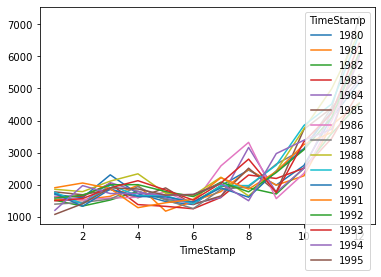

In [20]:
plt.figure(figsize=(12,6))
monthly_year.plot()

In [21]:
df_yearly = df1.resample('A').sum()
df_yearly

,Sparkling
TimeStamp,
1980-12-31,28406
1981-12-31,26227
1982-12-31,25321
1983-12-31,26180
1984-12-31,28431
1985-12-31,29640
1986-12-31,29170
1987-12-31,30258
1988-12-31,33246


<AxesSubplot:xlabel='TimeStamp'>

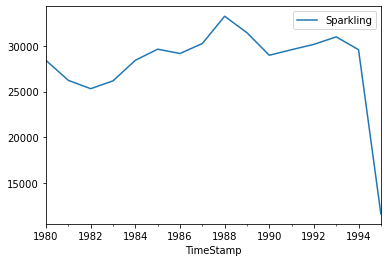

In [22]:
df_yearly.plot()

In [23]:
df_yearly_mean = df1.resample('A').mean()
df_yearly_mean

,Sparkling
TimeStamp,
1980-12-31,2367.166667
1981-12-31,2185.583333
1982-12-31,2110.083333
1983-12-31,2181.666667
1984-12-31,2369.250000
1985-12-31,2470.000000
1986-12-31,2430.833333
1987-12-31,2521.500000
1988-12-31,2770.500000


<AxesSubplot:xlabel='TimeStamp'>

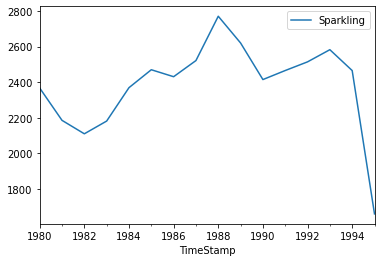

In [24]:
df_yearly_mean.plot()

In [25]:
df_quart = df1.resample('Q').sum()
df_quart

,Sparkling
TimeStamp,
1980-03-31,5581
1980-06-30,4560
1980-09-30,6403
1980-12-31,11862
1981-03-31,4686
...,...
1994-09-30,6494
1994-12-31,13113
1995-03-31,4369


<AxesSubplot:xlabel='TimeStamp'>

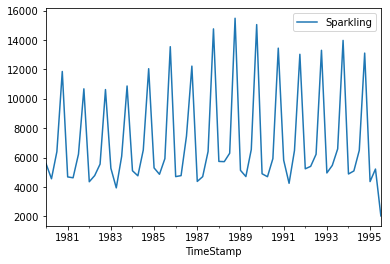

In [26]:
df_quart.plot()

In [27]:
df_quart_mean = df1.resample('Q').mean()
df_quart_mean

,Sparkling
TimeStamp,
1980-03-31,1860.333333
1980-06-30,1520.000000
1980-09-30,2134.333333
1980-12-31,3954.000000
1981-03-31,1562.000000
...,...
1994-09-30,2164.666667
1994-12-31,4371.000000
1995-03-31,1456.333333


<AxesSubplot:xlabel='TimeStamp'>

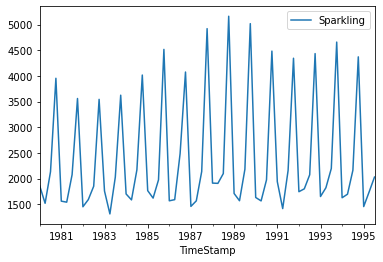

In [28]:
df_quart_mean.plot()

In [29]:
df_daily = df1.resample('D').sum()
df_daily

,Sparkling
TimeStamp,
1980-01-31,1686
1980-02-01,0
1980-02-02,0
1980-02-03,0
1980-02-04,0
...,...
1995-07-27,0
1995-07-28,0
1995-07-29,0


<AxesSubplot:xlabel='TimeStamp'>

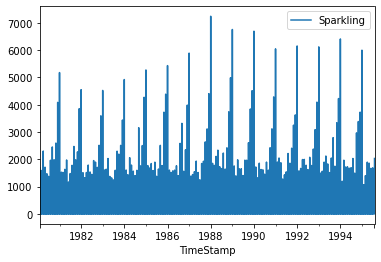

In [30]:
df_daily.plot()

In [31]:
df_daily_mean = df1.resample('D').mean()
df_daily_mean.ffill(axis ='rows',inplace=True)
df_daily_mean

,Sparkling
TimeStamp,
1980-01-31,1686.0
1980-02-01,1686.0
1980-02-02,1686.0
1980-02-03,1686.0
1980-02-04,1686.0
...,...
1995-07-27,1688.0
1995-07-28,1688.0
1995-07-29,1688.0


<AxesSubplot:xlabel='TimeStamp'>

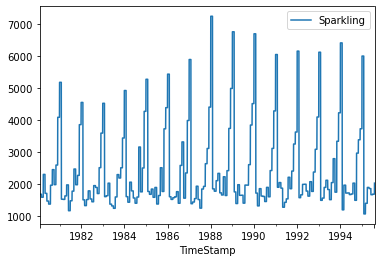

In [32]:
df_daily_mean.plot()

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

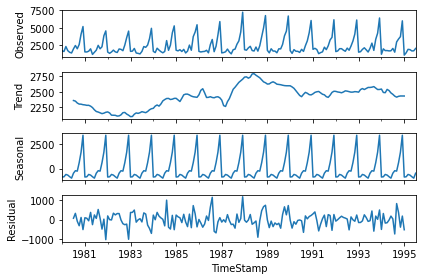

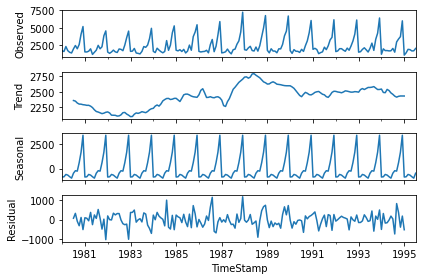

In [34]:
decomp = seasonal_decompose(df1,model='additive')
decomp.plot()

In [35]:
trend = decomp.trend
trend.head(10)

,Sparkling
TimeStamp,
1980-01-31,NaN
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
1980-06-30,NaN
1980-07-31,2360.666667
1980-08-31,2351.333333
1980-09-30,2320.541667


In [36]:
seasonal = decomp.seasonal
seasonal.head(10)

,Sparkling
TimeStamp,
1980-01-31,-854.260599
1980-02-29,-830.350678
1980-03-31,-592.356630
1980-04-30,-658.490559
1980-05-31,-824.416154
1980-06-30,-967.434011
1980-07-31,-465.502265
1980-08-31,-214.332821
1980-09-30,-254.677265


In [37]:
resid = decomp.resid
resid.head(10)

,Sparkling
TimeStamp,
1980-01-31,NaN
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
1980-06-30,NaN
1980-07-31,70.835599
1980-08-31,315.999487
1980-09-30,-81.864401


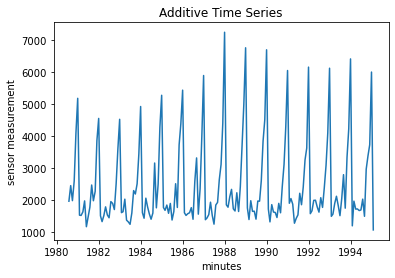

In [38]:
time = np.arange(50)
additive_plots = trend + seasonal + resid
plt.plot(additive_plots)
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("sensor measurement");

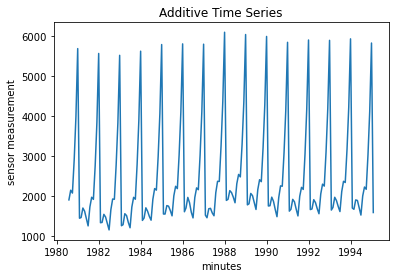

In [39]:
ignored_residual1 = np.ones_like(resid)
time = np.arange(50)
additive_plots = trend + seasonal + ignored_residual1
plt.plot(additive_plots)
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("sensor measurement");

In [40]:
deseasonal_df = trend+resid

<AxesSubplot:xlabel='TimeStamp'>

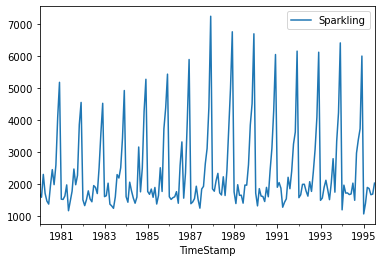

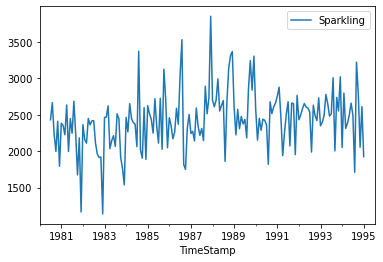

In [41]:
df1.plot()
deseasonal_df.plot()

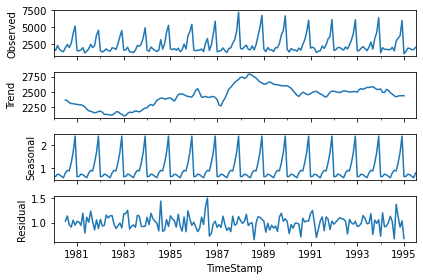

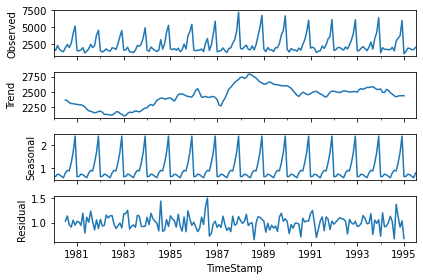

In [42]:
decomp1 = seasonal_decompose(df1,model='multiplicative')
decomp1.plot()

In [43]:
trend_m = decomp1.trend
trend_m.head(10)

,Sparkling
TimeStamp,
1980-01-31,NaN
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
1980-06-30,NaN
1980-07-31,2360.666667
1980-08-31,2351.333333
1980-09-30,2320.541667


In [44]:
seasonal_m = decomp1.seasonal
seasonal_m.head(10)

,Sparkling
TimeStamp,
1980-01-31,0.649843
1980-02-29,0.659214
1980-03-31,0.757440
1980-04-30,0.730351
1980-05-31,0.660609
1980-06-30,0.603468
1980-07-31,0.809164
1980-08-31,0.918822
1980-09-30,0.894367


In [45]:
resid_m = decomp1.resid
resid_m.head(10)

,Sparkling
TimeStamp,
1980-01-31,NaN
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
1980-06-30,NaN
1980-07-31,1.029230
1980-08-31,1.135407
1980-09-30,0.955954


Text(0, 0.5, 'sensor measurement')

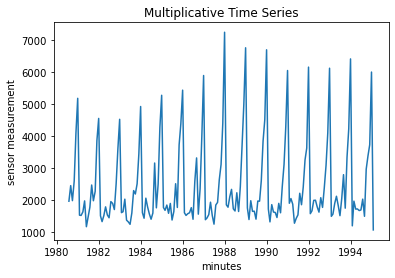

In [46]:
ignored_residual = np.ones_like(resid_m)
#multiplicative = trend_m * seasonal_m * ignored_residual
multiplicative = trend_m * seasonal_m * resid_m
plt.plot(multiplicative)
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("sensor measurement")

Text(0, 0.5, 'sensor measurement')

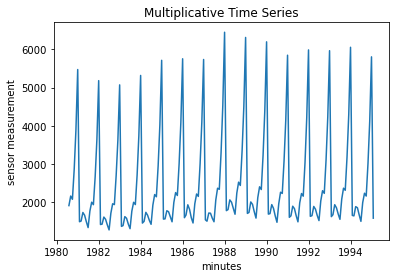

In [47]:
ignored_residual = np.ones_like(resid_m)
multiplicative = trend_m * seasonal_m * ignored_residual
#multiplicative = trend_m * seasonal_m * resid_m
plt.plot(multiplicative)
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("sensor measurement")

In [48]:
deseasonal_df_m = trend_m+resid_m

<AxesSubplot:xlabel='TimeStamp'>

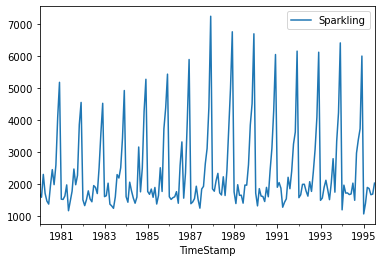

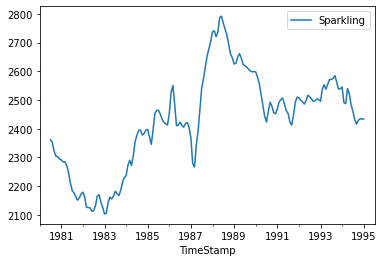

In [49]:
df1.plot()
deseasonal_df_m.plot()

<AxesSubplot:xlabel='TimeStamp'>

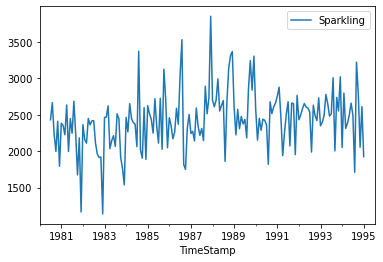

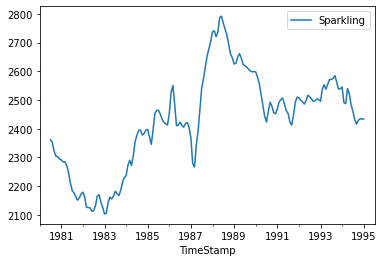

In [50]:
deseasonal_df.plot()
deseasonal_df_m.plot()

## Split the data into train and test and plot the training and test data. 

In [51]:
train = df1[df1.index<'1991']
test = df1[df1.index>='1991']

In [52]:
print("Shape of the train data",train.shape)
print("Shape of the test data",test.shape)

Shape of the train data (132, 1)
Shape of the test data (55, 1)


In [53]:
# Printing the AirPassengers Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Sparkling
TimeStamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471
...,...
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116


Test Data


,Sparkling
TimeStamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432
1991-06-30,1540
1991-07-31,2214
1991-08-31,1857
1991-09-30,2408


In [54]:
from IPython.display import display

In [55]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
TimeStamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
TimeStamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
TimeStamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
TimeStamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


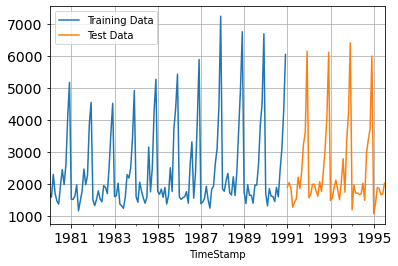

In [56]:
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Simple Exponential Smoothing

In [57]:
# create class
model_SES = SimpleExpSmoothing(train)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [58]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [59]:
## Let us check the parameters
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.762550263244,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [60]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    2403.76255
1991-02-28    2403.76255
1991-03-31    2403.76255
1991-04-30    2403.76255
1991-05-31    2403.76255
1991-06-30    2403.76255
1991-07-31    2403.76255
1991-08-31    2403.76255
1991-09-30    2403.76255
1991-10-31    2403.76255
1991-11-30    2403.76255
1991-12-31    2403.76255
1992-01-31    2403.76255
1992-02-29    2403.76255
1992-03-31    2403.76255
1992-04-30    2403.76255
1992-05-31    2403.76255
1992-06-30    2403.76255
1992-07-31    2403.76255
1992-08-31    2403.76255
1992-09-30    2403.76255
1992-10-31    2403.76255
1992-11-30    2403.76255
1992-12-31    2403.76255
1993-01-31    2403.76255
1993-02-28    2403.76255
1993-03-31    2403.76255
1993-04-30    2403.76255
1993-05-31    2403.76255
1993-06-30    2403.76255
1993-07-31    2403.76255
1993-08-31    2403.76255
1993-09-30    2403.76255
1993-10-31    2403.76255
1993-11-30    2403.76255
1993-12-31    2403.76255
1994-01-31    2403.76255
1994-02-28    2403.76255
1994-03-31    2403.76255
1994-04-30    2403.76255


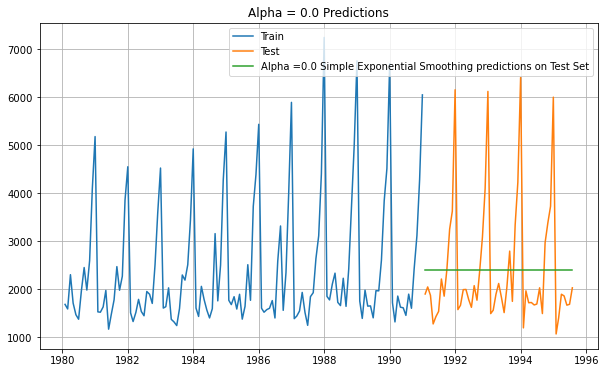

In [61]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.0 Predictions');

In [62]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1275.0817392898339
SES RMSE (calculated using statsmodels): 1275.0817392898339


In [63]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.098,SES'])
resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739


## Double Exponential Smoothing

In [64]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [65]:
model_DES = model_DES.fit()

In [66]:
model_DES.params

{'smoothing_level': 0.64781229341859,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.0826076865374,
 'initial_slope': 27.062658731812196,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [67]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    5281.502122
1991-02-28    5308.564780
1991-03-31    5335.627439
1991-04-30    5362.690098
1991-05-31    5389.752757
1991-06-30    5416.815415
1991-07-31    5443.878074
1991-08-31    5470.940733
1991-09-30    5498.003392
1991-10-31    5525.066050
1991-11-30    5552.128709
1991-12-31    5579.191368
1992-01-31    5606.254026
1992-02-29    5633.316685
1992-03-31    5660.379344
1992-04-30    5687.442003
1992-05-31    5714.504661
1992-06-30    5741.567320
1992-07-31    5768.629979
1992-08-31    5795.692638
1992-09-30    5822.755296
1992-10-31    5849.817955
1992-11-30    5876.880614
1992-12-31    5903.943273
1993-01-31    5931.005931
1993-02-28    5958.068590
1993-03-31    5985.131249
1993-04-30    6012.193907
1993-05-31    6039.256566
1993-06-30    6066.319225
1993-07-31    6093.381884
1993-08-31    6120.444542
1993-09-30    6147.507201
1993-10-31    6174.569860
1993-11-30    6201.632519
1993-12-31    6228.695177
1994-01-31    6255.757836
1994-02-28    6282.820495
1994-03-31  

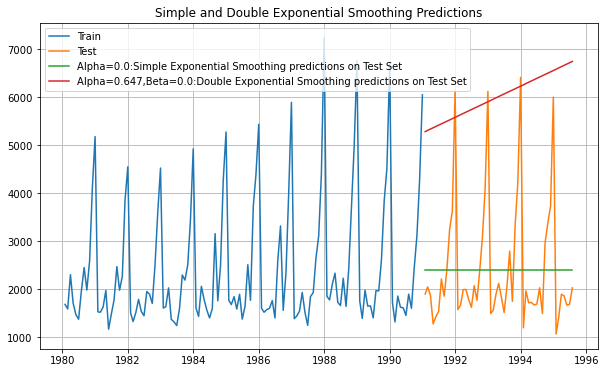

In [68]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.0:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.647,Beta=0.0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [69]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 3851.1294387304633


In [70]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.647,Beta=0.0:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439


In [71]:
# Initializing the Double Exponential Smoothing Model
model_DES1 = Holt(train,exponential=True)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [72]:
# Fitting the model
model_DES1 = model_DES1.fit()

In [73]:
model_DES1.params

{'smoothing_level': 0.7307090782489399,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1687.4654804942545,
 'initial_slope': 0.9409001417447868,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [74]:
# Forecasting using this model for the duration of the test set
DES_predict1 =  model_DES1.forecast(len(test))
DES_predict1

1991-01-31    5075.011579
1991-02-28    4775.079114
1991-03-31    4492.872615
1991-04-30    4227.344480
1991-05-31    3977.509021
1991-06-30    3742.438801
1991-07-31    3521.261199
1991-08-31    3313.155161
1991-09-30    3117.348161
1991-10-31    2933.113326
1991-11-30    2759.766744
1991-12-31    2596.664921
1992-01-31    2443.202392
1992-02-29    2298.809477
1992-03-31    2162.950163
1992-04-30    2035.120115
1992-05-31    1914.844804
1992-06-30    1801.677748
1992-07-31    1695.198848
1992-08-31    1595.012837
1992-09-30    1500.747804
1992-10-31    1412.053822
1992-11-30    1328.601641
1992-12-31    1250.081472
1993-01-31    1176.201834
1993-02-28    1106.688473
1993-03-31    1041.283341
1993-04-30     979.743643
1993-05-31     921.840933
1993-06-30     867.360264
1993-07-31     816.099396
1993-08-31     767.868037
1993-09-30     722.487145
1993-10-31     679.788257
1993-11-30     639.612867
1993-12-31     601.811838
1994-01-31     566.244843
1994-02-28     532.779853
1994-03-31  

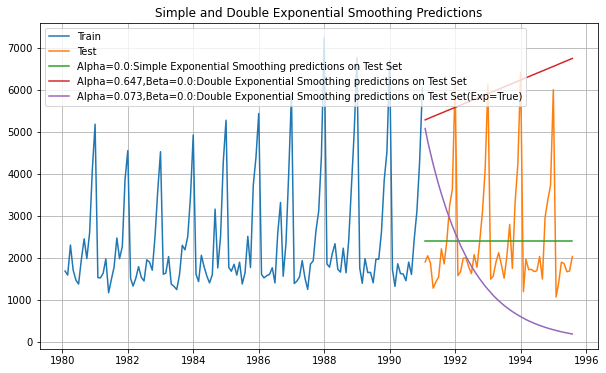

In [75]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict, label='Alpha=0.0:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.647,Beta=0.0:Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict1, label='Alpha=0.073,Beta=0.0:Double Exponential Smoothing predictions on Test Set(Exp=True)')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [76]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict1.values,squared=False))

DES RMSE: 2135.0566757901315


In [77]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict1.values,squared=False)]}
                           ,index=['Alpha=0.073,Beta=0.0:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676


## Triple Exponential Smoothing or Holt Winter's Method

In [78]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive')

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [79]:
# Fitting the model
model_TES = model_TES.fit()

In [80]:
model_TES.params

{'smoothing_level': 0.08623089766184816,
 'smoothing_slope': 3.896462894854104e-10,
 'smoothing_seasonal': 0.4763368992674647,
 'damping_slope': nan,
 'initial_level': 1685.0465533546023,
 'initial_slope': 6.956424224149114e-10,
 'initial_seasons': array([  38.52881932,  -37.57358256,  464.69631723,  205.93129973,
        -140.6536742 , -156.86592282,  338.19548509,  856.39848276,
         402.99998598,  971.16197989, 2401.40352534, 3426.27237449]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
TES_predict = model_TES.forecast(len(test))
TES_predict

1991-01-31    1532.348599
1991-02-28    1241.314340
1991-03-31    1726.703013
1991-04-30    1584.248244
1991-05-31    1493.941871
1991-06-30    1311.395885
1991-07-31    1834.784340
1991-08-31    1696.096104
1991-09-30    2338.834507
1991-10-31    3249.213487
1991-11-30    4324.362476
1991-12-31    6461.265884
1992-01-31    1532.348599
1992-02-29    1241.314340
1992-03-31    1726.703013
1992-04-30    1584.248244
1992-05-31    1493.941871
1992-06-30    1311.395885
1992-07-31    1834.784340
1992-08-31    1696.096104
1992-09-30    2338.834507
1992-10-31    3249.213487
1992-11-30    4324.362476
1992-12-31    6461.265884
1993-01-31    1532.348599
1993-02-28    1241.314340
1993-03-31    1726.703013
1993-04-30    1584.248244
1993-05-31    1493.941871
1993-06-30    1311.395885
1993-07-31    1834.784340
1993-08-31    1696.096104
1993-09-30    2338.834507
1993-10-31    3249.213487
1993-11-30    4324.362476
1993-12-31    6461.265884
1994-01-31    1532.348599
1994-02-28    1241.314340
1994-03-31  

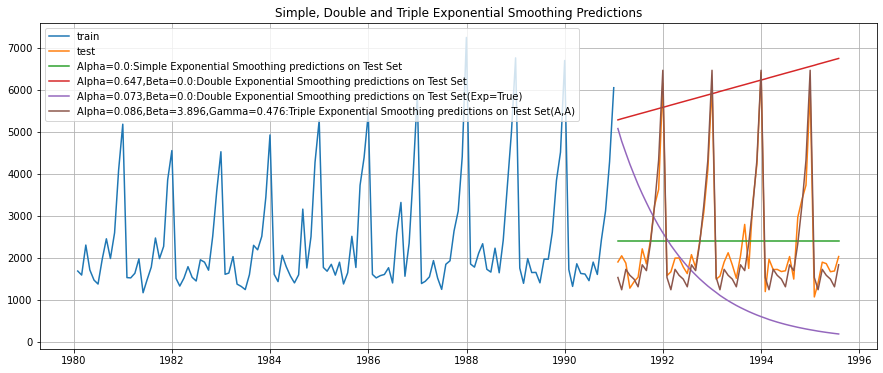

In [82]:
plt.figure(figsize=(15,6))
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict, label='Alpha=0.0:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.647,Beta=0.0:Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict1, label='Alpha=0.073,Beta=0.0:Double Exponential Smoothing predictions on Test Set(Exp=True)')
plt.plot(TES_predict, label='Alpha=0.086,Beta=3.896,Gamma=0.476:Triple Exponential Smoothing predictions on Test Set(A,A)')

plt.legend(loc='best')
plt.grid()
plt.title('Simple, Double and Triple Exponential Smoothing Predictions');

In [83]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 362.79502627634287


In [84]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.086,Beta=3.896,Gamma=0.476:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026


In [85]:
# Initializing the Double Exponential Smoothing Model
model_TES1 = ExponentialSmoothing(train,trend='mul',seasonal='additive')

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [86]:
# Fitting the model
model_TES1 = model_TES1.fit()

In [87]:
model_TES1.params

{'smoothing_level': 0.08314532478008606,
 'smoothing_slope': 1.967568533823466e-09,
 'smoothing_seasonal': 0.4910344440693423,
 'damping_slope': nan,
 'initial_level': 1640.0000032568673,
 'initial_slope': 0.9998252081989077,
 'initial_seasons': array([  45.99999833,  -48.99999886,  663.99996952,   72.00001907,
        -168.99999657, -262.99998467,  326.00000136,  813.00000633,
         344.00000906,  956.00000263, 2446.99999404, 3538.99998397]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
TES_predict1 = model_TES1.forecast(len(test))
TES_predict1

1991-01-31    1535.358977
1991-02-28    1238.479948
1991-03-31    1727.698367
1991-04-30    1580.066246
1991-05-31    1492.387494
1991-06-30    1310.232290
1991-07-31    1830.700524
1991-08-31    1682.175743
1991-09-30    2338.359433
1991-10-31    3246.026424
1991-11-30    4320.584789
1991-12-31    6470.071214
1992-01-31    1531.930585
1992-02-29    1235.052156
1992-03-31    1724.271174
1992-04-30    1576.639652
1992-05-31    1488.961499
1992-06-30    1306.806894
1992-07-31    1827.275726
1992-08-31    1678.751544
1992-09-30    2334.935833
1992-10-31    3242.603423
1992-11-30    4317.162385
1992-12-31    6466.649409
1993-01-31    1528.509378
1993-02-28    1231.631546
1993-03-31    1720.851162
1993-04-30    1573.220238
1993-05-31    1485.542683
1993-06-30    1303.388676
1993-07-31    1823.858106
1993-08-31    1675.334521
1993-09-30    2331.519407
1993-10-31    3239.187594
1993-11-30    4313.747154
1993-12-31    6463.234774
1994-01-31    1525.095340
1994-02-28    1228.218105
1994-03-31  

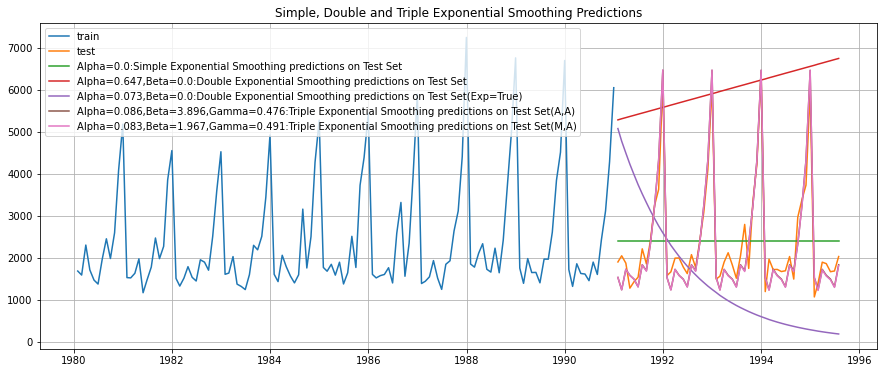

In [89]:
plt.figure(figsize=(15,6))
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict, label='Alpha=0.0:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.647,Beta=0.0:Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict1, label='Alpha=0.073,Beta=0.0:Double Exponential Smoothing predictions on Test Set(Exp=True)')
plt.plot(TES_predict, label='Alpha=0.086,Beta=3.896,Gamma=0.476:Triple Exponential Smoothing predictions on Test Set(A,A)')
plt.plot(TES_predict1, label='Alpha=0.083,Beta=1.967,Gamma=0.491:Triple Exponential Smoothing predictions on Test Set(M,A)')

plt.legend(loc='best')
plt.grid()
plt.title('Simple, Double and Triple Exponential Smoothing Predictions');

In [90]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict1.values,squared=False))

TES RMSE: 366.94877416555914


In [91]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict1.values,squared=False)]}
                           ,index=['Alpha=0.083,Beta=1.967,Gamma=0.491:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026
"Alpha=0.083,Beta=1.967,Gamma=0.491:TES",366.948774


In [92]:
# Initializing the Triple Exponential Smoothing Model
model_TES2 = ExponentialSmoothing(train,trend='mul',seasonal='mul')

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [93]:
# Fitting the model
model_TES2 = model_TES2.fit()

In [94]:
model_TES2.params

{'smoothing_level': 0.15341611498968094,
 'smoothing_slope': 3.405100155267661e-22,
 'smoothing_seasonal': 0.36909930433038646,
 'damping_slope': nan,
 'initial_level': 1640.0000825494478,
 'initial_slope': 1.002823637788699,
 'initial_seasons': array([1.0088922 , 0.96948306, 1.24312435, 1.13282486, 0.94014402,
        0.93860405, 1.22597071, 1.54639001, 1.27515569, 1.63524434,
        2.48873458, 3.1270512 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
TES_predict2 = model_TES2.forecast(len(test))
TES_predict2

1991-01-31    1603.353263
1991-02-28    1375.800945
1991-03-31    1808.586567
1991-04-30    1706.375912
1991-05-31    1603.451360
1991-06-30    1416.340639
1991-07-31    1946.523625
1991-08-31    1914.410417
1991-09-30    2435.788079
1991-10-31    3335.401886
1991-11-30    4411.813930
1991-12-31    6335.042629
1992-01-31    1658.532427
1992-02-29    1423.148930
1992-03-31    1870.828804
1992-04-30    1765.100585
1992-05-31    1658.633900
1992-06-30    1465.083791
1992-07-31    2013.512946
1992-08-31    1980.294567
1992-09-30    2519.615363
1992-10-31    3450.189246
1992-11-30    4563.645850
1992-12-31    6553.062179
1993-01-31    1715.610574
1993-02-28    1472.126389
1993-03-31    1935.213100
1993-04-30    1825.846259
1993-05-31    1715.715539
1993-06-30    1515.504432
1993-07-31    2082.807694
1993-08-31    2048.446110
1993-09-30    2606.327551
1993-10-31    3568.926996
1993-11-30    4720.703043
1993-12-31    6778.584839
1994-01-31    1774.653057
1994-02-28    1522.789399
1994-03-31  

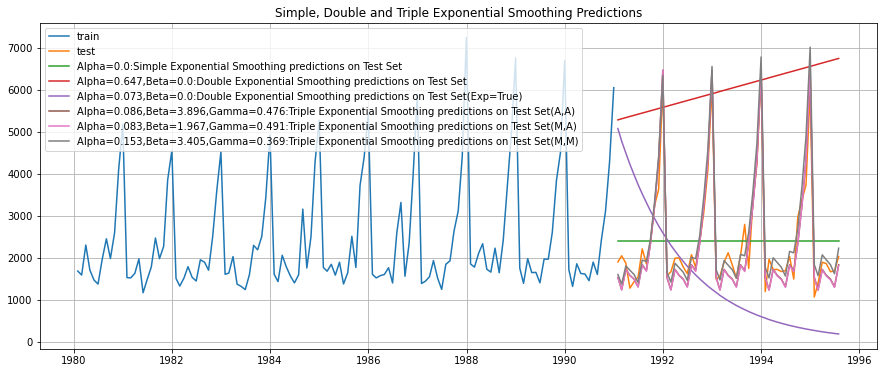

In [96]:
plt.figure(figsize=(15,6))
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict, label='Alpha=0.0:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.647,Beta=0.0:Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict1, label='Alpha=0.073,Beta=0.0:Double Exponential Smoothing predictions on Test Set(Exp=True)')
plt.plot(TES_predict, label='Alpha=0.086,Beta=3.896,Gamma=0.476:Triple Exponential Smoothing predictions on Test Set(A,A)')
plt.plot(TES_predict1, label='Alpha=0.083,Beta=1.967,Gamma=0.491:Triple Exponential Smoothing predictions on Test Set(M,A)')
plt.plot(TES_predict2, label='Alpha=0.153,Beta=3.405,Gamma=0.369:Triple Exponential Smoothing predictions on Test Set(M,M)')

plt.legend(loc='best')
plt.grid()
plt.title('Simple, Double and Triple Exponential Smoothing Predictions');

In [97]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict2.values,squared=False))

TES RMSE: 392.95715278648663


In [98]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict2.values,squared=False)]}
                           ,index=['Alpha=0.153,Beta=3.405,Gamma=0.369:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026
"Alpha=0.083,Beta=1.967,Gamma=0.491:TES",366.948774
"Alpha=0.153,Beta=3.405,Gamma=0.369:TES",392.957153


# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training and testing data before fitting it into a linear regression.

In [99]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print("Regression time for train: \n",train_time)
print("Regression time for test: \n",test_time)

Regression time for train: 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Regression time for test: 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [100]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [101]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Sparkling,time
TimeStamp,,
1980-01-31,1686,1
1980-02-29,1591,2
1980-03-31,2304,3
1980-04-30,1712,4
1980-05-31,1471,5


Last few rows of Training Data


,Sparkling,time
TimeStamp,,
1990-08-31,1605,128
1990-09-30,2424,129
1990-10-31,3116,130
1990-11-30,4286,131
1990-12-31,6047,132


First few rows of Test Data


,Sparkling,time
TimeStamp,,
1991-01-31,1902,133
1991-02-28,2049,134
1991-03-31,1874,135
1991-04-30,1279,136
1991-05-31,1432,137


Last few rows of Test Data


,Sparkling,time
TimeStamp,,
1995-03-31,1897,183
1995-04-30,1862,184
1995-05-31,1670,185
1995-06-30,1688,186
1995-07-31,2031,187


In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lr = LinearRegression()

In [104]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train[['Sparkling']])

LinearRegression()

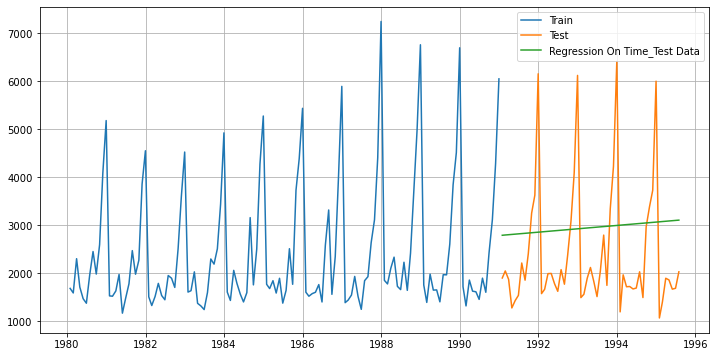

In [105]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(12,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [106]:
from sklearn import metrics

In [107]:
rmse_model1_test=metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print('Regression on test data: ',rmse_model1_test)

Regression on test data:  1389.135174897992


In [108]:
resultsDf_1 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026
"Alpha=0.083,Beta=1.967,Gamma=0.491:TES",366.948774
"Alpha=0.153,Beta=3.405,Gamma=0.369:TES",392.957153
RegressionOnTime,1389.135175


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [109]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [110]:
NaiveModel_train.tail()

,Sparkling
TimeStamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


In [111]:
[len(train['Sparkling'])-1]

[131]

In [112]:
np.asarray(train['Sparkling'])[len(train['Sparkling'])-1]

6047

In [113]:
np.asarray(train['Sparkling'])[len(np.array(train['Sparkling']))-1]

6047

In [114]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.array(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

TimeStamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

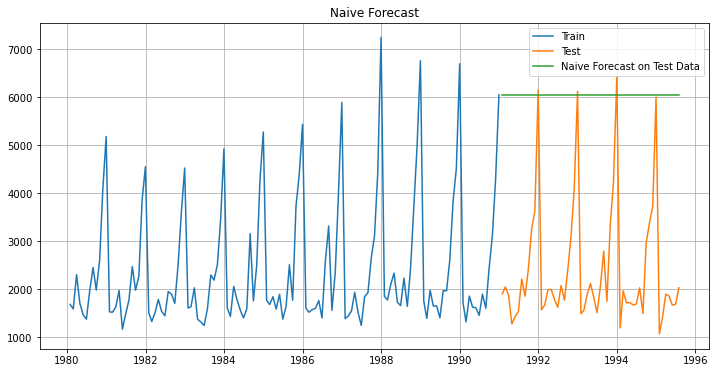

In [115]:
plt.figure(figsize=(12,6))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [116]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 3864.279


In [117]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026
"Alpha=0.083,Beta=1.967,Gamma=0.491:TES",366.948774
"Alpha=0.153,Beta=3.405,Gamma=0.369:TES",392.957153
RegressionOnTime,1389.135175
NaiveModel,3864.279352


## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [118]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [119]:
SimpleAverage_test['mean_forecast']=train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
TimeStamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


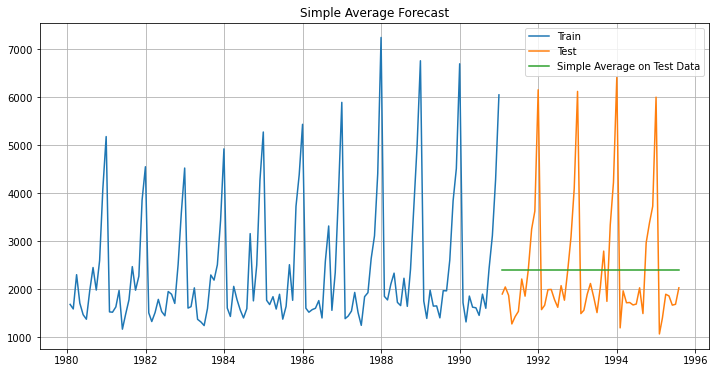

In [120]:
plt.figure(figsize=(12,6))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [121]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [122]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026
"Alpha=0.083,Beta=1.967,Gamma=0.491:TES",366.948774
"Alpha=0.153,Beta=3.405,Gamma=0.369:TES",392.957153
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [123]:
MovingAverage = df1.copy()
MovingAverage.head()

,Sparkling
TimeStamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [124]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
TimeStamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


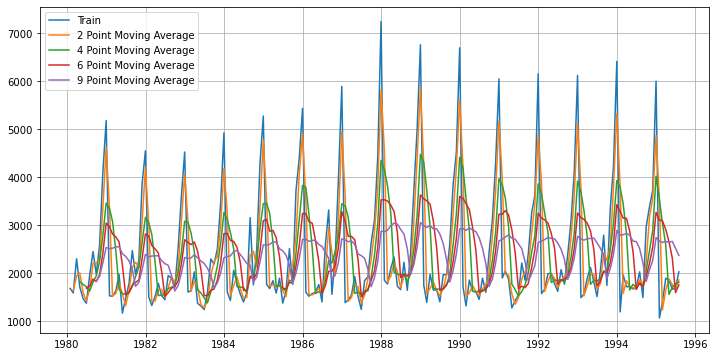

In [125]:
## Plotting on the whole data
plt.figure(figsize=(12,6))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [126]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

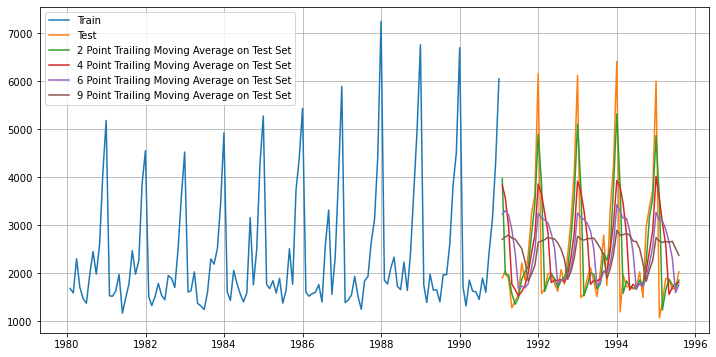

In [127]:
## Plotting on both the Training and Test data

plt.figure(figsize=(12,6))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [128]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 1346.278


In [129]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026
"Alpha=0.083,Beta=1.967,Gamma=0.491:TES",366.948774
"Alpha=0.153,Beta=3.405,Gamma=0.369:TES",392.957153
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684


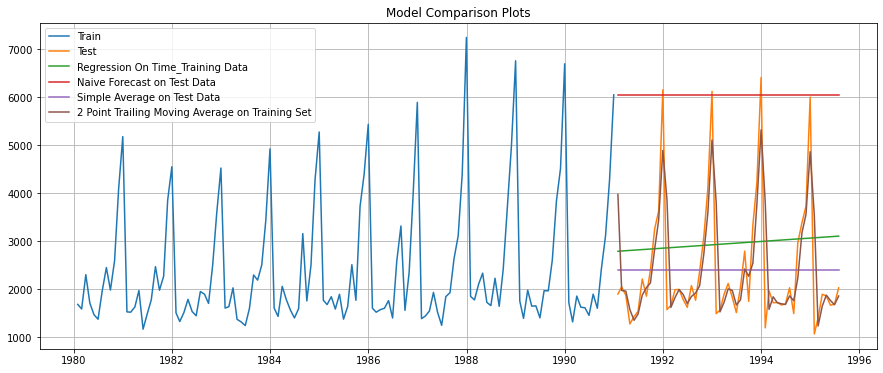

In [130]:
## Plotting on both Training and Test data

plt.figure(figsize=(15,6))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [131]:
#try taking log, np.log(train) and np.log(test) then apply SES or any other models.

## Check for stationarity of the whole Time Series data.

In [132]:
print('STEP 1: H0 : Time Series is non-stationary \n        H1 : Time Series is stationary  \n')
print('STEP 2: Consider the level of significanace (α) as 0.05 \n')
print('STEP 3: Using the Augmented Dickey Fuller (ADF) test we test for stationarity. \n')

STEP 1: H0 : Time Series is non-stationary 
        H1 : Time Series is stationary  

STEP 2: Consider the level of significanace (α) as 0.05 

STEP 3: Using the Augmented Dickey Fuller (ADF) test we test for stationarity. 



In [133]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [134]:
#sales_ts = df1['Sparkling']

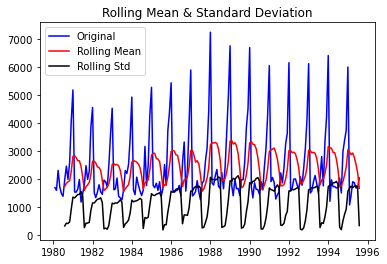

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [135]:
test_stationarity(df1['Sparkling'])

In [136]:
#sales_ts_1 = df1['Sparkling'].diff(periods=1)
#df1['Sparkling'].dropna(inplace=True)

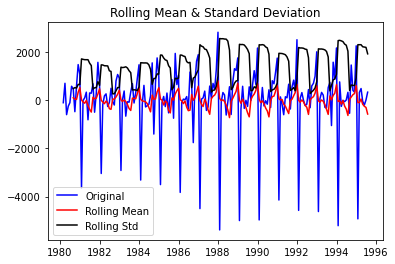

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [137]:
test_stationarity(df1['Sparkling'].diff().dropna())

In [138]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

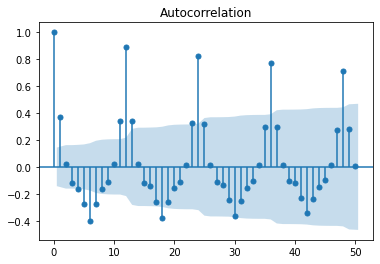

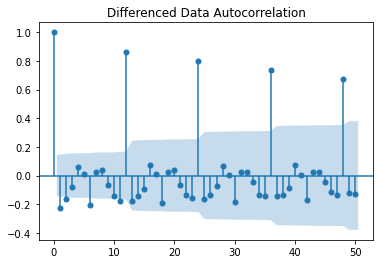

In [139]:
plot_acf(df1['Sparkling'],lags=50)
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


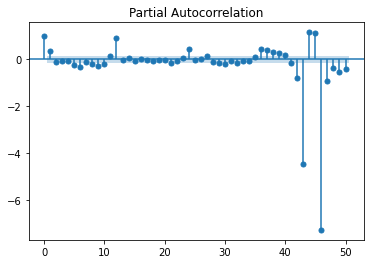

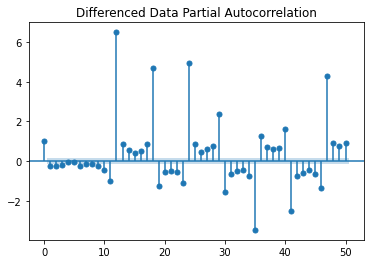

In [140]:
plot_pacf(df1['Sparkling'],lags=50)
plot_pacf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [141]:
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

In [142]:
train['Sparkling'].head()

TimeStamp
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
Name: Sparkling, dtype: int64

In [143]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
TimeStamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
TimeStamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
TimeStamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
TimeStamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


## Check for stationarity of the Training Data Time Series.

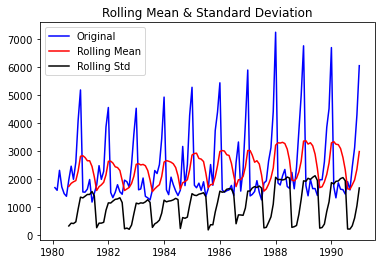

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [144]:
test_stationarity(train['Sparkling'])

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [145]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = range(0, 3)
q = range(1,3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 2)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [146]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [147]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1) - AIC:2264.9064376843794


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2) - AIC:2232.7830976847804


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1) - AIC:2235.0139453498286


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2) - AIC:2233.5976471192453


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1) - AIC:2232.36048988372


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2) - AIC:2210.616568616669


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [148]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
5,"(2, 1, 2)",2210.616569
4,"(2, 1, 1)",2232.360490
1,"(0, 1, 2)",2232.783098
3,"(1, 1, 2)",2233.597647
2,"(1, 1, 1)",2235.013945
0,"(0, 1, 1)",2264.906438


In [149]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.308
Method:                       css-mle   S.D. of innovations           1011.622
Date:                Wed, 24 Feb 2021   AIC                           2210.617
Time:                        16:52:52   BIC                           2227.868
Sample:                    02-29-1980   HQIC                          2217.626
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5854      0.516     10.819      0.000       4.574       6.597
ar.L1.D.Sparkling     1.2704      0.074     17.053      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


## Predict on the Test Set using this model and evaluate the model.

In [150]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [151]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1375.1911127976161


In [152]:
resultsDf_ar = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_ar])
resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026
"Alpha=0.083,Beta=1.967,Gamma=0.491:TES",366.948774
"Alpha=0.153,Beta=3.405,Gamma=0.369:TES",392.957153
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

<Figure size 720x576 with 0 Axes>

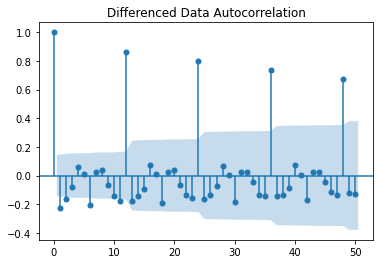

In [153]:
plt.figure(figsize=(10,8))
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 and 12. We will run our auto SARIMA models by setting seasonality as 6 and 12.

### Setting the seasonality as 6 of the auto SARIMA model.

In [154]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq_6 = list(itertools.product(p, d, q))
model_pdq_6 = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq_6[i], model_pdq_6[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)


In [155]:
SARIMA_AIC_6 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_6

,param,seasonal,AIC


In [156]:
import statsmodels.api as sm

for param in pdq_6:
    for param_seasonal in model_pdq_6:
        SARIMA_model_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_6 = SARIMA_model_6.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_6.aic))
        SARIMA_AIC_6 = SARIMA_AIC_6.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_6.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716284
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536889432
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984442793
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111369451


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510577
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805655947
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850585
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082825
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339551432
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785886
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.517429813499
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274148128
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885104007626
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.771793307308
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6414785480165
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.441010168716
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.6843840215593
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.115146046086
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.7395689234913
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.421558283564
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.6963213594381
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC

In [157]:
SARIMA_AIC_6.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1727.510411
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.888803
80,"(2, 1, 2)","(2, 0, 2, 6)",1729.335504
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.641479
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.374727


In [158]:
import statsmodels.api as sm1

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.755
Date:                           Wed, 24 Feb 2021   AIC                           1727.510
Time:                                   16:54:44   BIC                           1749.539
Sample:                                        0   HQIC                          1736.453
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6457      0.287     -2.252      0.024      -1.208      -0.084
ma.L1         -0.1062      0.251     -0.423

<Figure size 1296x720 with 0 Axes>

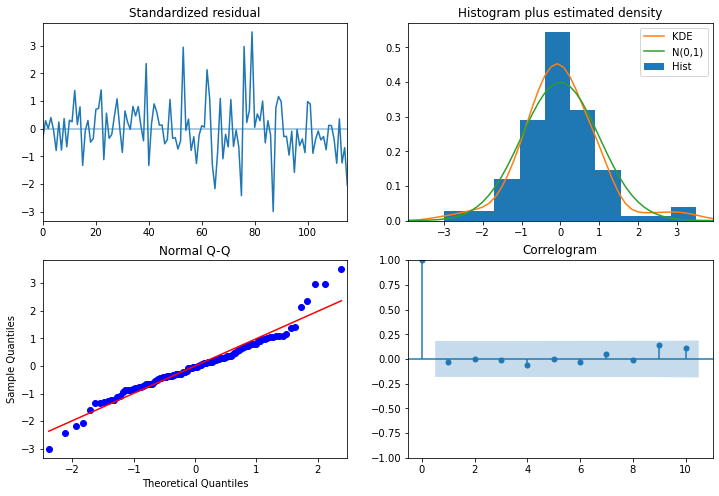

In [159]:
plt.figure(figsize=(18,10))
results_auto_SARIMA_6.plot_diagnostics(figsize=(12,8))
plt.show()

In [160]:
predicted_auto_SARIMA_spark_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [161]:
predicted_auto_SARIMA_spark_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1329.970280,380.495956,584.211911,2075.728650
1,1177.183301,392.034960,408.808898,1945.557704
2,1624.663524,392.231104,855.904686,2393.422362
3,1544.396128,397.639940,765.036167,2323.756089
4,1306.219617,398.860608,524.467190,2087.972045


In [162]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_spark_6.predicted_mean,squared=False)
print(rmse)

629.3543786815898


In [163]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026
"Alpha=0.083,Beta=1.967,Gamma=0.491:TES",366.948774
"Alpha=0.153,Beta=3.405,Gamma=0.369:TES",392.957153
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684


### Setting the seasonality as 12 of the auto SARIMA model.

In [164]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [165]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [166]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844335
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023831
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388217
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791694
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415861703
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920854
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850585
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566335
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957313733
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838598
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193788088
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.150914454185
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176473
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085378472
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824182222
SARIMA(0, 1, 2)

In [167]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1556.080255
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121564
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340405


In [168]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Wed, 24 Feb 2021   AIC                           1555.584
Time:                                    16:58:04   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

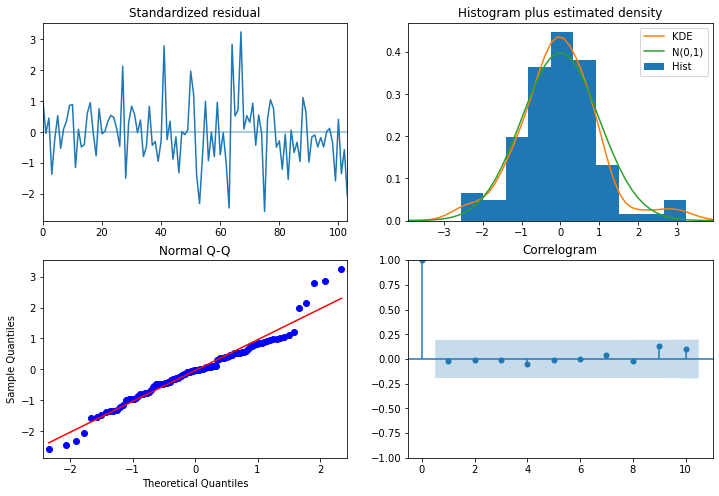

In [169]:
results_auto_SARIMA_12.plot_diagnostics(figsize=(12,8))
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [170]:
predicted_auto_SARIMA_spark = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [171]:
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.396751,388.342573,566.259295,2088.534207
1,1315.146575,402.004292,527.232640,2103.060509
2,1621.596092,401.997900,833.694686,2409.497498
3,1598.898865,407.235450,800.732050,2397.065680
4,1392.702502,407.965058,593.105681,2192.299322


In [172]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_spark.predicted_mean,squared=False)
print(rmse)

528.6027745984775


In [173]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026
"Alpha=0.083,Beta=1.967,Gamma=0.491:TES",366.948774
"Alpha=0.153,Beta=3.405,Gamma=0.369:TES",392.957153
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


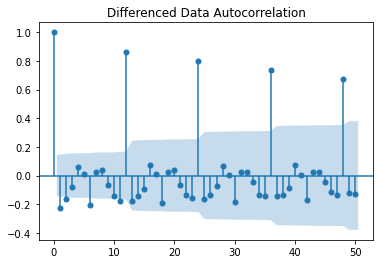

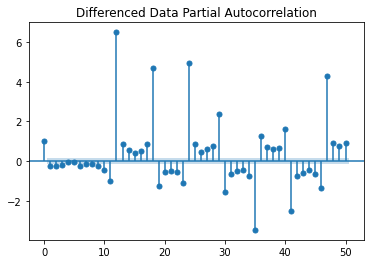

In [174]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF plot cuts-off at lag 0 so 0 AR terms.
ACF plot has 2 MA terms, since we have lag 1 and 2 out of the confidence interval.

In [175]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1105.999
Date:                Wed, 24 Feb 2021   AIC                           2228.927
Time:                        16:58:07   BIC                           2249.054
Sample:                    02-29-1980   HQIC                          2237.105
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9812        nan        nan        nan         nan         nan
ar.L1.D.Sparkling    -0.4419        nan        nan        nan         nan         nan
ar.L2.D.Sparkling     0.

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


## Predict on the Test Set using this model and evaluate the model.

In [176]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [177]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1378.7863165247775


In [178]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026
"Alpha=0.083,Beta=1.967,Gamma=0.491:TES",366.948774
"Alpha=0.153,Beta=3.405,Gamma=0.369:TES",392.957153
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


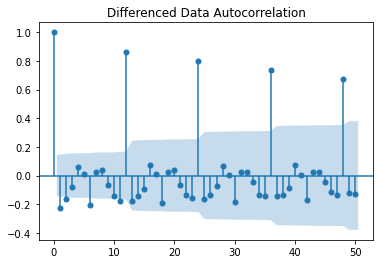

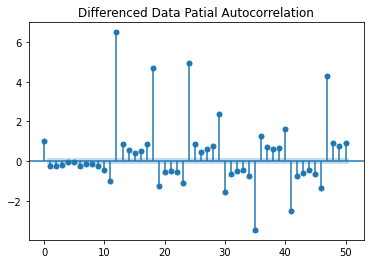

In [179]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

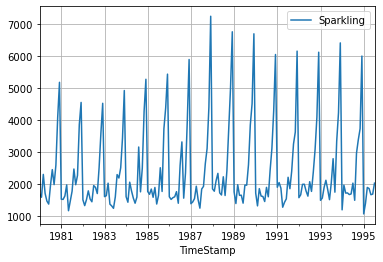

In [180]:
df1.plot()
plt.grid();

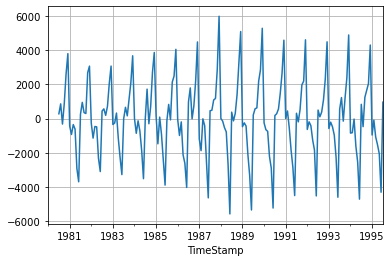

In [181]:
(df1['Sparkling'].diff(6)).plot()
plt.grid();

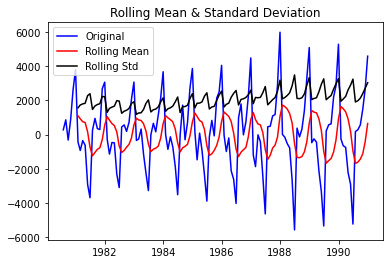

Results of Dickey-Fuller Test:
Test Statistic                -8.181919e+00
p-value                        8.088278e-13
#Lags Used                     6.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [182]:
test_stationarity(train['Sparkling'].diff(6).dropna())

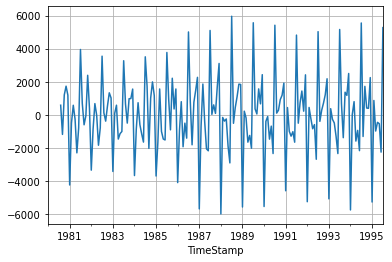

In [183]:
(df1['Sparkling'].diff(6).diff()).plot()
plt.grid();

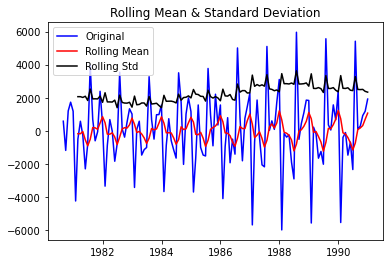

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [184]:
test_stationarity(train['Sparkling'].diff(6).dropna().diff().dropna())

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


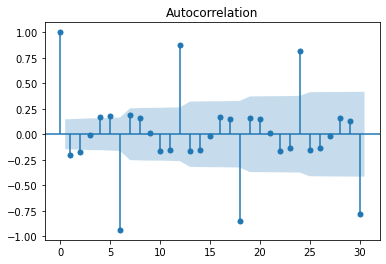

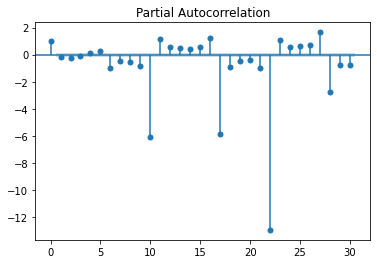

In [185]:
plot_acf((df1['Sparkling'].diff(6).diff().dropna()),lags=30)
plot_pacf((df1['Sparkling'].diff(6).diff().dropna()),lags=30);

In [186]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(2, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(2, 1, 2, 6)   Log Likelihood                -812.727
Date:                           Wed, 24 Feb 2021   AIC                           1645.454
Time:                                   16:58:21   BIC                           1672.458
Sample:                                        0   HQIC                          1656.407
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6201      0.257     -2.413      0.016      -1.124      -0.116
ar.L2          0.0281      0.165      0.171

<Figure size 720x576 with 0 Axes>

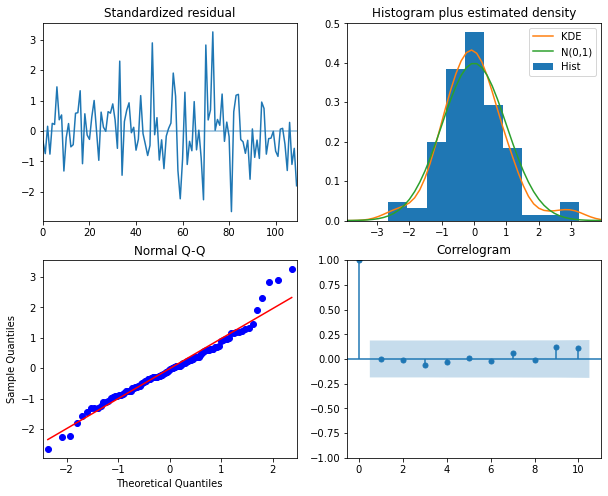

In [187]:
plt.figure(figsize=(10,8))
results_manual_SARIMA_6.plot_diagnostics(figsize=(10,8))
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [188]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [189]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1375.891063,387.744970,615.924887,2135.857238
1,1137.467537,398.444009,356.531629,1918.403445
2,1728.458302,398.480320,947.451227,2509.465377
3,1678.367938,407.173774,880.322005,2476.413870
4,1308.598560,407.251724,510.399848,2106.797272


In [190]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

596.465833090646


In [191]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(3,1,2)(2,1,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026
"Alpha=0.083,Beta=1.967,Gamma=0.491:TES",366.948774
"Alpha=0.153,Beta=3.405,Gamma=0.369:TES",392.957153
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


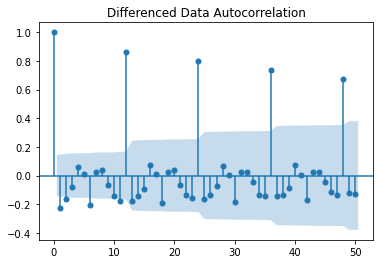

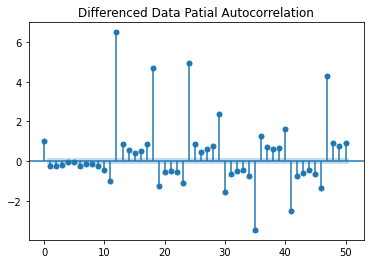

In [192]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

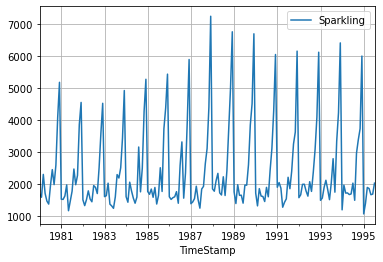

In [193]:
df1.plot()
plt.grid();

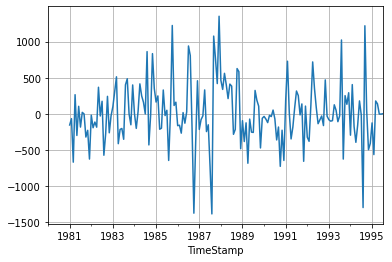

In [194]:
(df1['Sparkling'].diff(12)).plot()
plt.grid();

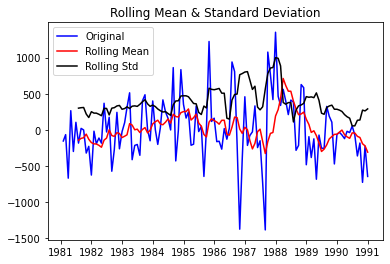

Results of Dickey-Fuller Test:
Test Statistic                  -3.136812
p-value                          0.023946
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [195]:
test_stationarity(train['Sparkling'].diff(12).dropna())

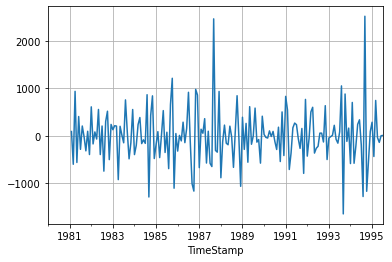

In [196]:
(df1['Sparkling'].diff(12).diff()).plot()
plt.grid();

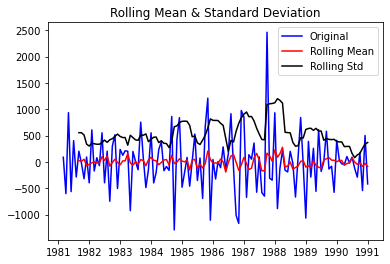

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [197]:
test_stationarity(train['Sparkling'].diff(12).dropna().diff().dropna())

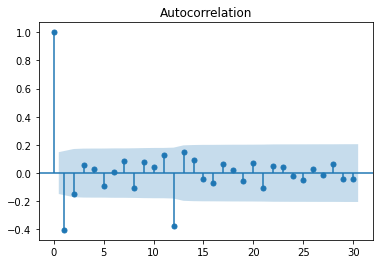

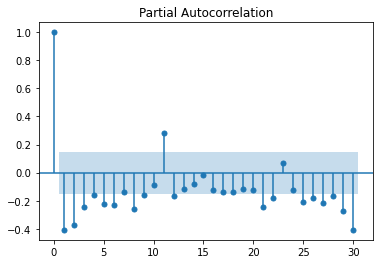

In [198]:
plot_acf((df1['Sparkling'].diff(12).diff().dropna()),lags=30)
plot_pacf((df1['Sparkling'].diff(12).diff().dropna()),lags=30);

In [199]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(6, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(6, 1, 1, 12)   Log Likelihood                -323.675
Date:                            Wed, 24 Feb 2021   AIC                            673.349
Time:                                    17:00:18   BIC                            696.543
Sample:                                         0   HQIC                           681.951
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5243      0.239     -2.190      0.029      -0.993      -0.055
ar.L2          0.3109      0.423   

## Predict on the Test Set using this model and evaluate the model.

In [200]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [201]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1416.435687,359.386769,712.050562,2120.820811
1,1566.569539,393.804974,794.725973,2338.413105
2,1728.570350,394.324103,955.709309,2501.431391
3,1657.538332,426.831787,820.963402,2494.113262
4,1670.459061,425.904715,835.701159,2505.216962


In [202]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

369.67790310011503


In [203]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(3,1,2)(6,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha=0.098,SES",1275.081739
"Alpha=0.647,Beta=0.0:DES",3851.129439
"Alpha=0.073,Beta=0.0:DES",2135.056676
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026
"Alpha=0.083,Beta=1.967,Gamma=0.491:TES",366.948774
"Alpha=0.153,Beta=3.405,Gamma=0.369:TES",392.957153
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684


In [204]:
print('In Sparkling the sorted order of Test RMSE values:')
resultsDf.sort_values(by=['Test RMSE'])

In Sparkling the sorted order of Test RMSE values:


,Test RMSE
"Alpha=0.086,Beta=3.896,Gamma=0.476:TES",362.795026
"Alpha=0.083,Beta=1.967,Gamma=0.491:TES",366.948774
"SARIMA(3,1,2)(6,1,1,12)",369.677903
"Alpha=0.153,Beta=3.405,Gamma=0.369:TES",392.957153
"SARIMA(1,1,2)(1,0,2,12)",528.602775
"SARIMA(3,1,2)(2,1,2,6)",596.465833
"SARIMA(1,1,2)(2,0,2,6)",629.354379
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
"Alpha=0.098,SES",1275.081739


## Building the most optimum model on the Full Data.

In [205]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(df1['Sparkling'],trend='additive',seasonal='additive')

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [206]:
# Fitting the model
model_TES = model_TES.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


## Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [207]:
model_TES.params

{'smoothing_level': 0.05263157894736842,
 'smoothing_slope': 0.05263157894736842,
 'smoothing_seasonal': 0.3684210526315789,
 'damping_slope': nan,
 'initial_level': 1580.0,
 'initial_slope': 0.0,
 'initial_seasons': array([ 106.,   11.,  724.,  132., -109., -203.,  386.,  873.,  404.,
        1016., 2507., 3599.]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [208]:
TES_predict = model_TES.forecast(steps=12)
TES_predict

1995-08-31    1884.976788
1995-09-30    2402.258515
1995-10-31    3245.977251
1995-11-30    3932.213221
1995-12-31    6119.724097
1996-01-31    1266.116928
1996-02-29    1583.646654
1996-03-31    1821.829064
1996-04-30    1795.729443
1996-05-31    1643.054827
1996-06-30    1576.941994
1996-07-31    1975.093858
Freq: M, dtype: float64

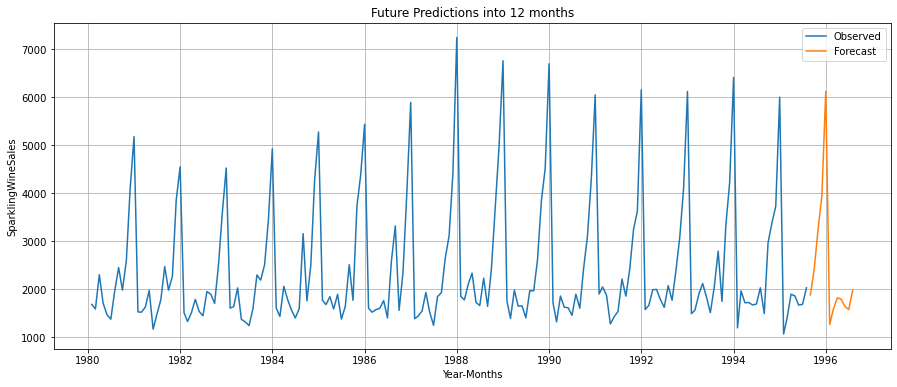

In [209]:
plt.figure(figsize=(15,6))
plt.plot(df1['Sparkling'],label='Observed')
plt.plot(TES_predict,label='Forecast')
plt.legend(loc='best')
plt.xlabel('Year-Months')
plt.ylabel('SparklingWineSales')
plt.grid()
plt.title('Future Predictions into 12 months');

In [210]:
import statsmodels.api as sm

full_data_model = sm.tsa.statespace.SARIMAX(df1['Sparkling'],
                                order=(3, 1, 2),
                                seasonal_order=(6, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(6, 1, 1, 12)   Log Likelihood                -728.128
Date:                            Wed, 24 Feb 2021   AIC                           1482.255
Time:                                    17:03:30   BIC                           1515.992
Sample:                                01-31-1980   HQIC                          1495.905
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8419      0.138     -6.085      0.000      -1.113      -0.571
ar.L2          0.1372      0.180   

In [211]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [212]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1670.649906,373.927219,937.766024,2403.533789
1995-09-30,2585.837941,380.057714,1840.938509,3330.737372
1995-10-31,3273.964520,380.653598,2527.897178,4020.031862
1995-11-30,4025.371893,383.811989,3273.114218,4777.629568
1995-12-31,6013.266030,383.848468,5260.936856,6765.595203


In [213]:
rmse = mean_squared_error(df1['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 626.1178672873177


In [214]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

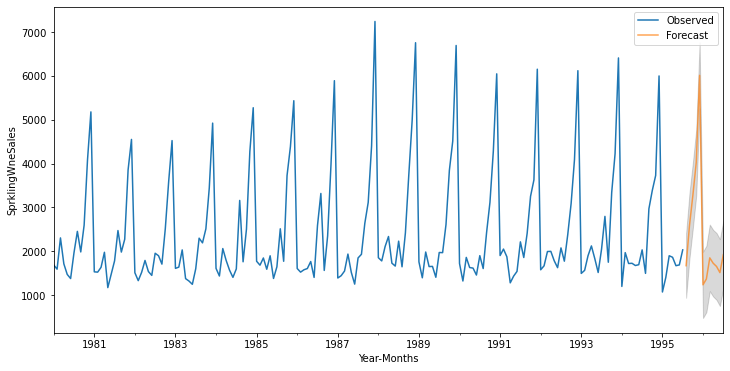

In [218]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,6))
axis = df1['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('SprklingWneSales')
plt.legend(loc='best')
plt.show()